Explore the corpora available in NLTK (any two) 

• Raw corpus

• POS tagged

• Parsed

• Multilingual aligned

• Spoken language

• Semantic tagged

In [26]:
import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('universal_tagset')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import brown
from nltk.probability import FreqDist

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


**POS Tagged**

In [18]:
text = word_tokenize("The sun moves slowly to hide behind the line of horizon, while the moon races to take its place in prominence atop the night sky")
print(nltk.pos_tag(text))

[('The', 'DT'), ('sun', 'NN'), ('moves', 'VBZ'), ('slowly', 'RB'), ('to', 'TO'), ('hide', 'VB'), ('behind', 'IN'), ('the', 'DT'), ('line', 'NN'), ('of', 'IN'), ('horizon', 'NN'), (',', ','), ('while', 'IN'), ('the', 'DT'), ('moon', 'NN'), ('races', 'VBZ'), ('to', 'TO'), ('take', 'VB'), ('its', 'PRP$'), ('place', 'NN'), ('in', 'IN'), ('prominence', 'NN'), ('atop', 'IN'), ('the', 'DT'), ('night', 'NN'), ('sky', 'NN')]


In [19]:
tagged_token = nltk.tag.str2tuple('sing/NN')
tagged_token

('sing', 'NN')

In [21]:
nltk.corpus.brown.tagged_words(categories='government')

[('The', 'AT'), ('Office', 'NN-TL'), ('of', 'IN-TL'), ...]

[('NOUN', 19486), ('ADP', 10221), ('VERB', 9872), ('DET', 8043), ('.', 7598), ('ADJ', 5692), ('CONJ', 2560), ('ADV', 2333), ('NUM', 1612), ('PRT', 1358), ('PRON', 1269), ('X', 73)]


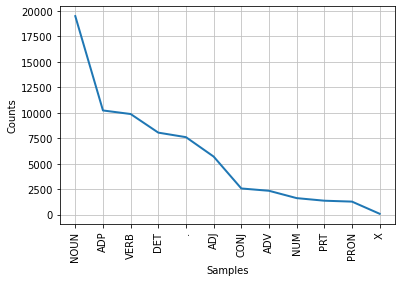

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
TaggedWords = brown.tagged_words(categories='government', tagset='universal')
TaggedFrequencyDist = nltk.FreqDist(tag for (word, tag) in TaggedWords)
print(TaggedFrequencyDist.most_common())

TaggedFrequencyDist.plot()

**Parsed**

In [54]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det NP | Det N
    VP -> V NP
    N -> "monkey" | "banana"
    Det -> "the"
    V -> "ate"
""")

In [55]:
sentence = "The monkey ate the banana".lower().split()
rd_parser = nltk.RecursiveDescentParser(grammar)
for tree in rd_parser.parse(sentence):
    print(tree)

(S (NP (Det the) (N monkey)) (VP (V ate) (NP (Det the) (N banana))))


In [43]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked" 
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with" | "named"
  """)

In [45]:
sent = "John saw a man named Bob with a telescope in the park".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
    print(tree)

(S
  (NP John)
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P named) (NP Bob)))
    (PP
      (P with)
      (NP (Det a) (N telescope) (PP (P in) (NP (Det the) (N park)))))))
